In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_caba = pd.read_feather('./data/CovidCabaFeather')
df_caba.head()

,index,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,...,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id
0,0,1000000,M,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,None,...,NO,NaT,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0
1,6,1000008,F,69.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-31,...,NO,NaT,NO,2,Privado,Caso Descartado,Descartado,2,2020-06-01,0
2,8,1000010,M,7.0,Años,Argentina,CABA,COMUNA 07,CABA,None,...,NO,NaT,NO,2,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,7
3,10,1000012,M,46.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-26,...,NO,NaT,NO,2,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2,2020-05-31,0
4,13,1000015,F,29.0,Años,Argentina,CABA,COMUNA 07,Buenos Aires,2020-05-18,...,NO,NaT,NO,6,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,7


## Unificamos la escala de edades

Dividimos las edades en meses por 12 asi medimos todo en años

In [3]:
df_caba.loc[df_caba.edad_años_meses == 'Meses', 'edad'] = df_caba.edad / 12
df_caba.loc[df_caba.edad_años_meses == 'Meses',:]

,index,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,...,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id
161,737,1000994,F,0.333333,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-06-01,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,2020-06-01,0
325,1366,1001796,F,0.500000,Meses,Argentina,CABA,COMUNA 07,CABA,None,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,NaT,7
343,1409,1001862,NR,0.500000,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,None,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,2020-06-01,0
457,1707,1002272,F,0.500000,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-31,...,NO,NaT,NO,2,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,0
511,1853,1002474,M,0.833333,Meses,Argentina,CABA,COMUNA 07,CABA,None,...,NO,NaT,NO,2,Público,Caso confirmado por laboratorio - Activo Inter...,Confirmado,2,2020-06-01,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357066,2262539,996913,NR,0.916667,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,None,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,2020-05-31,0
357240,2263010,997460,F,0.750000,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-28,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,2020-05-28,0
357441,2263620,998140,F,0.583333,Meses,Argentina,CABA,COMUNA 01,CABA,None,...,NO,NaT,NO,2,Público,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-06-01,1
357534,2263913,998524,F,0.833333,Meses,Argentina,CABA,SIN ESPECIFICAR,CABA,None,...,NO,NaT,NO,2,Privado,Caso Descartado,Descartado,2,2020-05-29,0


Con las edades unificadas removemos la columna 'edad_años_meses' y aprovechamos para sacar tambien la columna de provincia de residencia ya solo vamos a usar los datos de CABA.

In [4]:
df_caba = df_caba.drop(['index', 'edad_años_meses', 'residencia_provincia_nombre'], axis=1)

In [5]:
df_caba.tail()

,id_evento_caso,sexo,edad,residencia_pais_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,fecha_internacion,...,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id
357708,999976,F,27.0,Argentina,SIN ESPECIFICAR,CABA,2020-05-15,2020-06-01,23,NaT,...,NO,NaT,NO,2,Público,Caso Descartado,Descartado,2,2020-06-01,0
357709,999982,M,38.0,Argentina,SIN ESPECIFICAR,Tucumán,None,2020-06-01,23,NaT,...,NO,NaT,NO,90,Público,Caso Descartado,Descartado,2,2020-06-02,0
357710,999990,F,50.0,Argentina,SIN ESPECIFICAR,CABA,2020-05-28,2020-06-01,23,2020-05-31,...,NO,NaT,NO,2,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2,2020-06-01,0
357711,999996,M,42.0,Argentina,SIN ESPECIFICAR,CABA,None,2020-06-01,23,NaT,...,NO,NaT,NO,2,Privado,Caso Descartado,Descartado,2,2020-06-01,0
357712,999997,F,30.0,Argentina,SIN ESPECIFICAR,Córdoba,None,2020-06-01,23,NaT,...,NO,NaT,NO,14,Público,Caso Descartado,Descartado,2,2020-06-02,0


## Modificamos las columnas con strings 'SI'/'NO' por variables booleanas.

In [7]:
df_caba.loc[df_caba.fallecido == 'NO', 'fallecido'] = False
df_caba.loc[df_caba.fallecido == 'SI', 'fallecido'] = True

df_caba.loc[df_caba.asistencia_respiratoria_mecanica == 'NO', 'asistencia_respiratoria_mecanica'] = False
df_caba.loc[df_caba.asistencia_respiratoria_mecanica == 'SI', 'asistencia_respiratoria_mecanica'] = True

Hacemos lo mismo para la columna 'sexo'

In [8]:
df_caba.loc[df_caba.sexo == 'M', 'sexo'] = 0
df_caba.loc[df_caba.sexo == 'F', 'sexo'] = 1

In [9]:
pd.get_dummies(df_caba.residencia_pais_nombre).describe()

,Argentina,Bolivia,Paraguay,SIN ESPECIFICAR
count,357713.000000,357713.000000,357713.000000,357713.000000
mean,0.976344,0.000011,0.000014,0.023631
std,0.151975,0.003344,0.003739,0.151896
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


## Evaluamos datos faltantes por columnas

In [10]:
df_caba.isnull().sum()

id_evento_caso                           0
sexo                                     0
edad                                   256
residencia_pais_nombre                   0
residencia_departamento_nombre           0
carga_provincia_nombre                   0
fecha_inicio_sintomas               187503
fecha_apertura                           0
sepi_apertura                            0
fecha_internacion                   314152
cuidado_intensivo                        0
fecha_cui_intensivo                 352872
fallecido                                0
fecha_fallecimiento                 352513
asistencia_respiratoria_mecanica         0
carga_provincia_id                       0
origen_financiamiento                    0
clasificacion                            0
clasificacion_resumen                    0
residencia_provincia_id                  0
fecha_diagnostico                    33996
residencia_departamento_id               0
dtype: int64

## Ordenamos los datos de acuerdo a la fecha de apertura

In [11]:
df_caba['fecha_apertura'] =pd.to_datetime(df_caba.fecha_apertura)
df_caba = df_caba.sort_values(by='fecha_apertura')

### Creamos un df unicamente con casos CONFIRMADOS de CABA

In [15]:
df_confirmados = pd.DataFrame(df_caba.loc[df_caba.clasificacion_resumen == 'Confirmado'])
df_confirmados.head() #notar que el primer caso confirmado fue el 02-03-2020

,id_evento_caso,sexo,edad,residencia_pais_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,fecha_internacion,...,fallecido,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id
322768,734634,0,43.0,Argentina,COMUNA 01,CABA,2020-02-28,2020-03-02,10,2020-03-01,...,False,NaT,False,2,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2,2020-03-03,1
322795,739292,0,24.0,Argentina,COMUNA 13,CABA,2020-03-01,2020-03-05,10,2020-03-03,...,False,NaT,False,2,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,2,2020-03-11,13
322792,738965,0,47.0,Argentina,COMUNA 03,CABA,2020-03-03,2020-03-05,10,2020-03-03,...,False,NaT,False,2,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-03-06,3
322791,738908,1,72.0,Argentina,COMUNA 07,CABA,2020-03-04,2020-03-05,10,NaT,...,False,NaT,False,2,Público,Caso confirmado por laboratorio - No Activo po...,Confirmado,2,2020-03-06,7
322782,737975,0,45.0,Argentina,COMUNA 05,CABA,2020-03-04,2020-03-05,10,NaT,...,False,NaT,False,2,Privado,Caso confirmado por laboratorio - No activo (p...,Confirmado,2,2020-03-06,5


### Creamos un df con casos confirmados acumulados diarios

In [16]:
ones = pd.DataFrame(np.ones(df_confirmados.fecha_apertura.count(), dtype=int)) #creo un array con "1"
df_fecha_apertura = pd.DataFrame(df_confirmados.fecha_apertura)
df_fecha_apertura = df_fecha_apertura.reset_index(drop=True)
df_fecha_apertura= pd.DataFrame(df_fecha_apertura.combine_first(ones))
df_fecha_apertura.columns =['fecha_apertura', 'conteo']
df_fecha_apertura

,fecha_apertura,conteo
0,2020-03-02,1.0
1,2020-03-05,1.0
2,2020-03-05,1.0
3,2020-03-05,1.0
4,2020-03-05,1.0
...,...,...
126087,2020-09-29,1.0
126088,2020-09-29,1.0
126089,2020-09-29,1.0
126090,2020-09-29,1.0


In [35]:
#cuento casos diarios
df_confirmados_xdias = pd.Series(df_fecha_apertura['conteo'].groupby(df_fecha_apertura['fecha_apertura'].dt.to_period('D')).sum())
df_confirmados_xdias.index = df_confirmados_xdias.index.to_timestamp() #el .to_timestamp lo pide despues el .reindex
type(df_confirmados_xdias.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [24]:
#creo un vector con fechas completas desde 01-03-20 hasta 29-09-20
df_fechas = pd.date_range('03-01-2020', '09-29-2020')
df_fechas

pandas.core.indexes.datetimes.DatetimeIndex

In [43]:
#relleno las fechas faltantes del dataset con 0 casos confirmados

df_confirmados_xdias.index = pd.DatetimeIndex(df_confirmados_xdias.index)

df_confirmados_xdias = df_confirmados_xdias.reindex(df_fechas, fill_value=0)
df_confirmados_xdias.columns = ['fecha_apertura','casos_positivos']
df_confirmados_xdias

2020-03-01      0.0
2020-03-02      1.0
2020-03-03      0.0
2020-03-04      0.0
2020-03-05      5.0
              ...  
2020-09-25    936.0
2020-09-26    691.0
2020-09-27    569.0
2020-09-28    784.0
2020-09-29    902.0
Freq: D, Name: conteo, Length: 213, dtype: float64

## Graficamos
### Casos confirmados (positivos) vs. tiempo

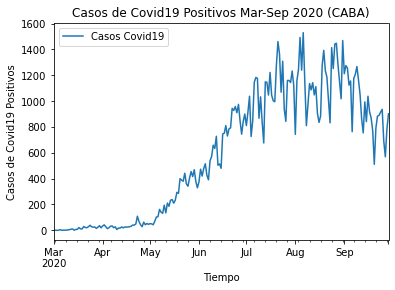

In [48]:
df_confirmados_xdias.plot(x='fecha_apertura', y='casos_positivos', label="Casos Covid19")

plt.xlabel('Tiempo')
plt.ylabel('Casos de Covid19 Positivos')
plt.title('Casos de Covid19 Positivos Mar-Sep 2020 (CABA)')
plt.legend()
plt.show()